## Car Power predection 

In [266]:
import numpy as np                                                     # ***Add comments****
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt

In [267]:
os.getcwd()

'C:\\Users\\Sandeep\\Kaggle\\Car price predection'

In [268]:
car_df = pd.read_csv(r"C:\Users\Sandeep\Kaggle\Car price predection\Automobile.csv")

In [269]:
car_df

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,usa
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,usa
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,usa
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,usa
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,usa
...,...,...,...,...,...,...,...,...,...
393,ford mustang gl,27.0,4,140.0,86.0,2790,15.6,82,usa
394,vw pickup,44.0,4,97.0,52.0,2130,24.6,82,europe
395,dodge rampage,32.0,4,135.0,84.0,2295,11.6,82,usa
396,ford ranger,28.0,4,120.0,79.0,2625,18.6,82,usa


In [270]:
car_df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [271]:
car_df.isnull().sum()

name            0
mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

In [272]:
from sklearn.impute import SimpleImputer

impute = SimpleImputer(strategy = 'mean')
car_df['horsepower'] = impute.fit_transform(car_df[['horsepower']])

In [273]:
car_df['origin'].unique()

array(['usa', 'japan', 'europe'], dtype=object)

In [274]:
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()

car_df = pd.get_dummies(car_df, columns = ['origin'])

car_df['origin_usa'] = Le.fit_transform(car_df['origin_usa'])
car_df['origin_japan'] = Le.fit_transform(car_df['origin_japan'])
car_df['origin_europe'] = Le.fit_transform(car_df['origin_europe'])

In [275]:
car_df

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_europe,origin_japan,origin_usa
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,0,0,1
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,0,0,1
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,0,0,1
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,0,0,1
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
393,ford mustang gl,27.0,4,140.0,86.0,2790,15.6,82,0,0,1
394,vw pickup,44.0,4,97.0,52.0,2130,24.6,82,1,0,0
395,dodge rampage,32.0,4,135.0,84.0,2295,11.6,82,0,0,1
396,ford ranger,28.0,4,120.0,79.0,2625,18.6,82,0,0,1


In [276]:
car_df = car_df.drop(['name'], axis = 1)

In [277]:
car_df.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_europe,origin_japan,origin_usa
mpg,1.000000,-0.775396,-0.804203,-0.771437,-0.831741,0.420289,0.579267,0.259022,0.442174,-0.568192
cylinders,-0.775396,1.000000,0.950721,0.838939,0.896017,-0.505419,-0.348746,-0.352861,-0.396479,0.604351
displacement,-0.804203,0.950721,1.000000,0.893646,0.932824,-0.543684,-0.370164,-0.373886,-0.433505,0.651407
horsepower,-0.771437,0.838939,0.893646,1.000000,0.860574,-0.684259,-0.411651,-0.281258,-0.321325,0.486083
weight,-0.831741,0.896017,0.932824,0.860574,1.000000,-0.417457,-0.306564,-0.298843,-0.440817,0.598398
acceleration,0.420289,-0.505419,-0.543684,-0.684259,-0.417457,1.000000,0.288137,0.204473,0.109144,-0.250806
model_year,0.579267,-0.348746,-0.370164,-0.411651,-0.306564,0.288137,1.000000,-0.024489,0.193101,-0.139883
origin_europe,0.259022,-0.352861,-0.373886,-0.281258,-0.298843,0.204473,-0.024489,1.000000,-0.229895,-0.597198
origin_japan,0.442174,-0.396479,-0.433505,-0.321325,-0.440817,0.109144,0.193101,-0.229895,1.000000,-0.643317
origin_usa,-0.568192,0.604351,0.651407,0.486083,0.598398,-0.250806,-0.139883,-0.597198,-0.643317,1.000000


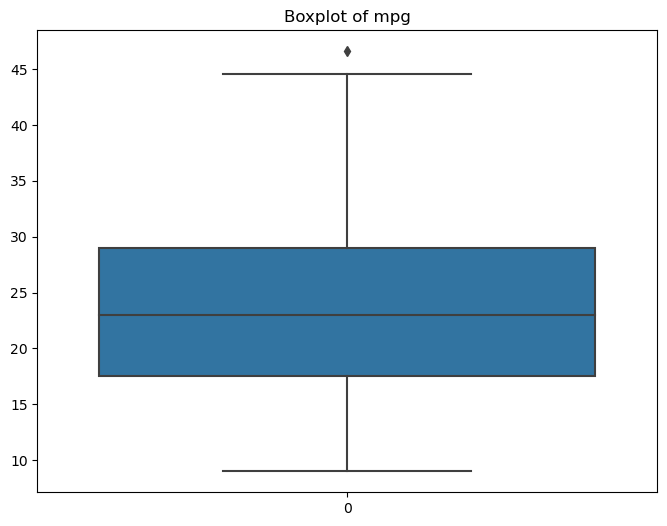

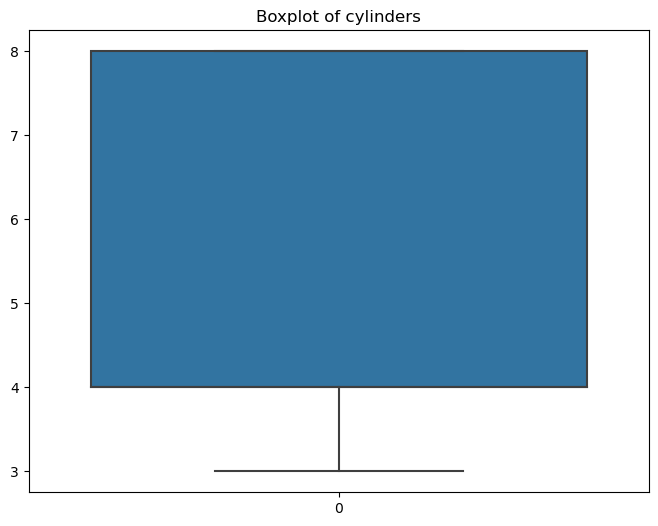

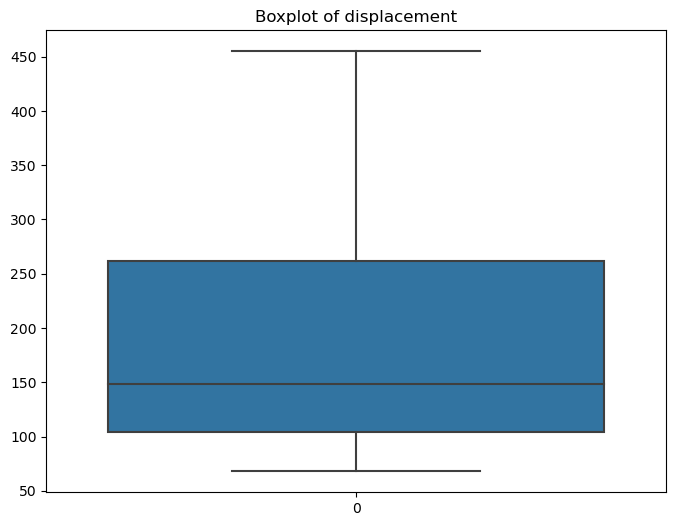

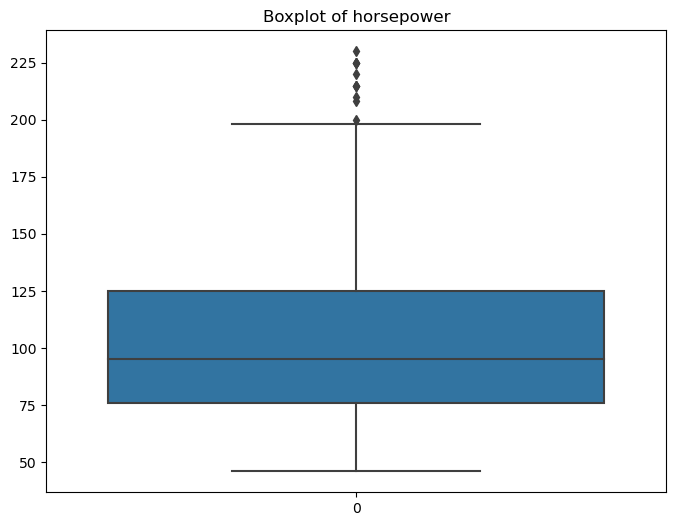

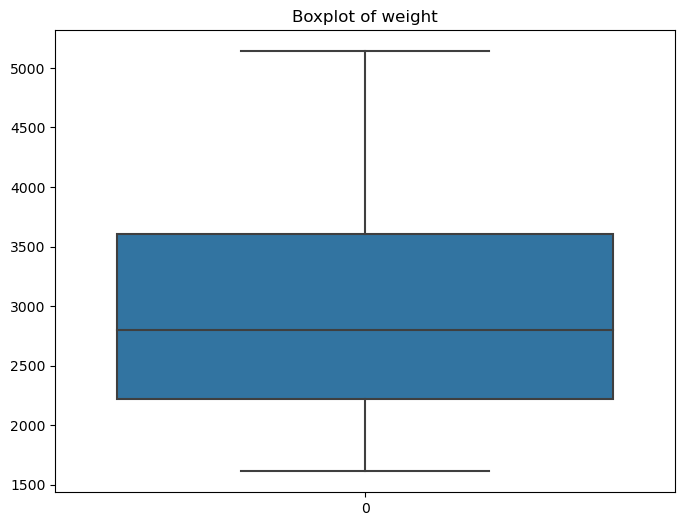

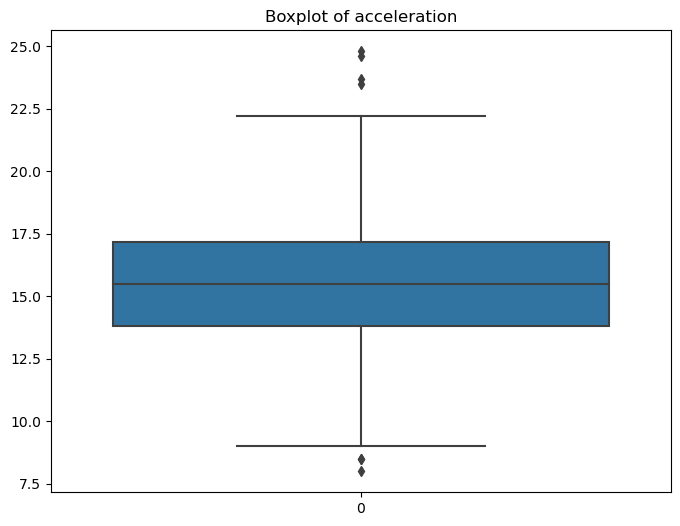

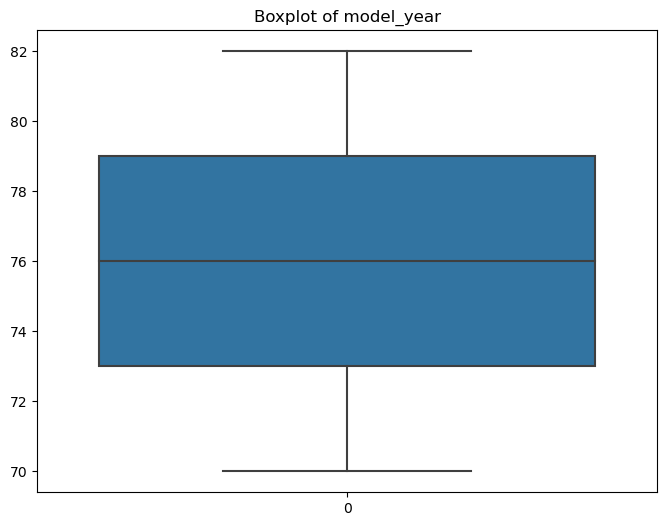

In [278]:
num_cols = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year']

for col in num_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(car_df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [279]:
# handle outliers in 'horsepower'
# first, calculate the IQR of 'horsepower'
Q1_hp = car_df['horsepower'].quantile(0.25)
Q3_hp = car_df['horsepower'].quantile(0.75)

IQR_hp = Q3_hp - Q1_hp

# define the upper and lower bounds for outliers
lower_bound_hp = Q1_hp - 1.5 * IQR_hp
upper_bound_hp = Q3_hp + 1.5 * IQR_hp

# cap outliers
car_df['horsepower'] = car_df['horsepower'].clip(lower=lower_bound_hp, upper=upper_bound_hp)

# handle outliers in 'Acceleration'
# first, calculate the IQR of 'horsepower'
Q1_hp = car_df['acceleration'].quantile(0.25)
Q3_hp = car_df['acceleration'].quantile(0.75)

IQR_hp = Q3_hp - Q1_hp

# define the upper and lower bounds for outliers
lower_bound_hp = Q1_hp - 1.5 * IQR_hp
upper_bound_hp = Q3_hp + 1.5 * IQR_hp

# cap outliers
car_df['acceleration'] = car_df['acceleration'].clip(lower=lower_bound_hp, upper=upper_bound_hp)

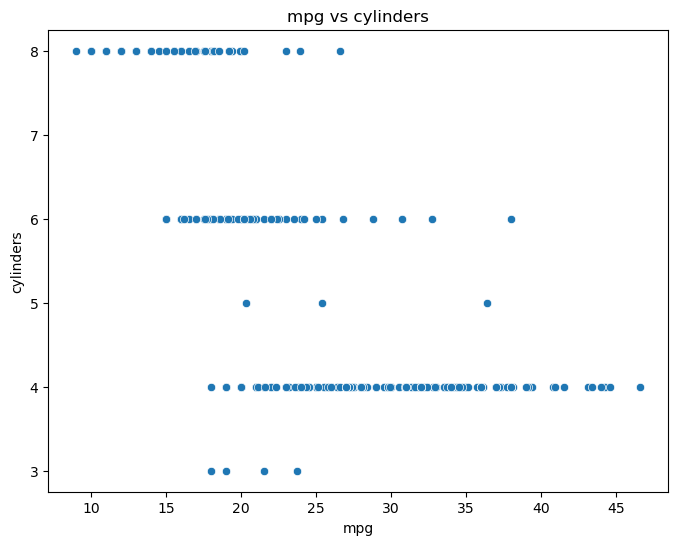

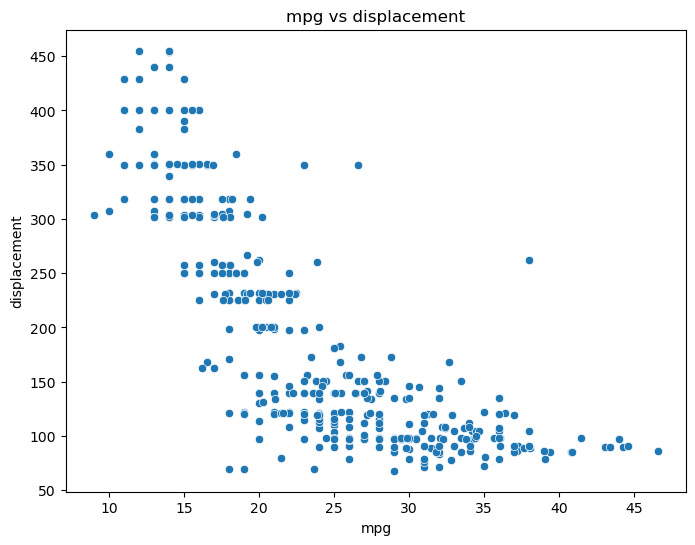

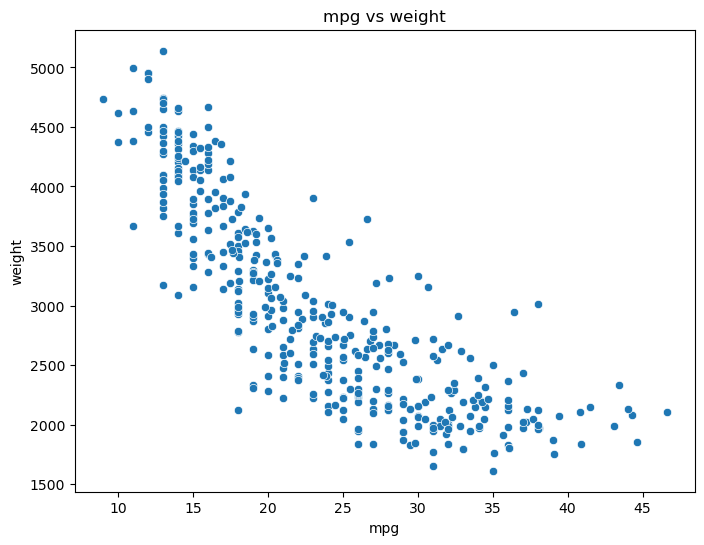

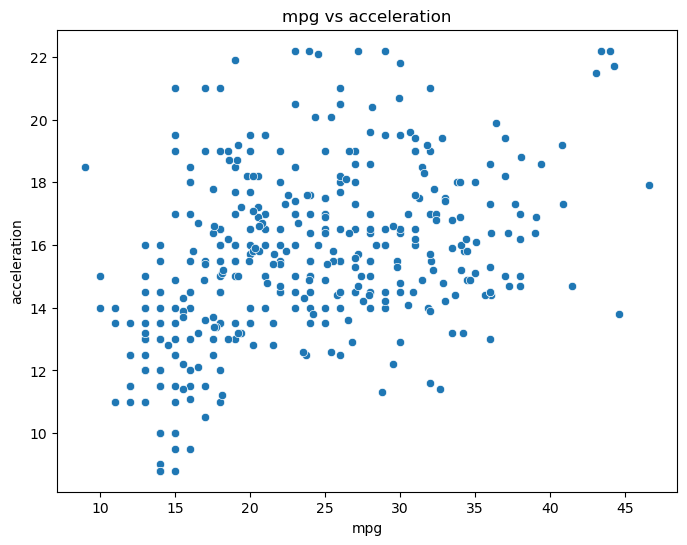

In [280]:
mpg_cols = ['cylinders', 'displacement', 'weight', 'acceleration']
for mpg_col in mpg_cols:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=car_df, x='mpg', y=f'{mpg_col}')
    plt.title(f"mpg vs {mpg_col}")
    plt.show()

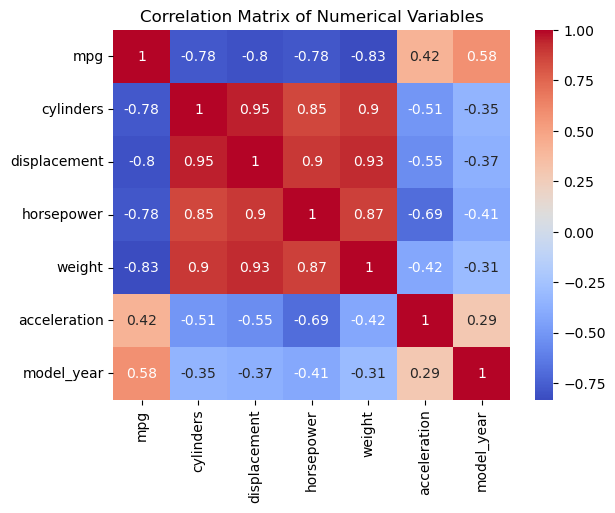

In [281]:
corr_matrix = car_df[num_cols].corr()

# Display the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

In [282]:
X = car_df[['cylinders', 'displacement', 'weight', 'acceleration']]
y = car_df[['mpg']]

In [283]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 12)

print("Shapes")
print("X_train",X_train.shape)
print("X_test",X_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

Shapes
X_train (278, 4)
X_test (120, 4)
y_train (278, 1)
y_test (120, 1)


In [284]:
X_train.head()

,cylinders,displacement,weight,acceleration
7,8,440.0,4312,8.8
106,8,350.0,4499,12.5
249,8,260.0,3365,15.5
44,8,400.0,5140,12.0
195,4,85.0,2035,22.2


In [285]:
y_train.head()

,mpg
7,14.0
106,12.0
249,19.9
44,13.0
195,29.0


In [286]:
from sklearn.tree import DecisionTreeRegressor

Tree = DecisionTreeRegressor()

Tree.fit(X_train, y_train)

DecisionTreeRegressor()

In [287]:
Pred = Tree.predict(X_train)

In [288]:
Pred[:5]

array([14. , 12. , 19.9, 13. , 29. ])

In [289]:
y_train.head()

,mpg
7,14.0
106,12.0
249,19.9
44,13.0
195,29.0


In [290]:
pred = Pred.reshape(-1,1)

In [291]:
error = y_train - pred

In [292]:
error

,mpg
7,0.0
106,0.0
249,0.0
44,0.0
195,0.0
...,...
241,0.0
253,0.0
390,0.0
155,0.0


In [293]:
Pred2 = Tree.predict(X_test)

In [294]:
pred2 = Pred2.reshape(-1,1)

In [295]:
error2 = y_test - pred2

In [296]:
error2

,mpg
391,13.0
386,7.0
254,2.2
1,1.0
35,-5.0
...,...
283,0.8
265,2.0
209,-11.0
285,-0.5


In [297]:
y_test.head()

,mpg
391,36.0
386,25.0
254,20.2
1,15.0
35,17.0


In [298]:
pred2[:5]

array([[23.],
       [18.],
       [18.],
       [14.],
       [22.]])

# DT models is overfitting

In [299]:
from sklearn.linear_model import LinearRegression
Lm = LinearRegression()
Lm.fit(X_train, y_train)

LinearRegression()

In [300]:
Predict = Lm.predict(X_train)

In [301]:
Predict[:5]

array([[11.69388857],
       [11.86572214],
       [19.64240559],
       [ 7.66196512],
       [31.24511449]])

In [302]:
y_train.head()

,mpg
7,14.0
106,12.0
249,19.9
44,13.0
195,29.0


In [303]:
predict = Lm.predict(X_test)

In [304]:
predict[:5]

array([[27.4794619 ],
       [23.56822497],
       [23.21273148],
       [16.41696581],
       [20.65738948]])

In [305]:
y_test.head()

,mpg
391,36.0
386,25.0
254,20.2
1,15.0
35,17.0


In [315]:
Error1 = y_train - Predict
Error2 = y_test - predict
print(Error1.head())
print(Error2.head())

          mpg
7    2.306111
106  0.134278
249  0.257594
44   5.338035
195 -2.245114
          mpg
391  8.520538
386  1.431775
254 -3.012731
1   -1.416966
35  -3.657389


In [316]:
from sklearn.metrics import  mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

print("Evaulation of train data")

Mean_error = mean_squared_error(Predict,y_train)
print( "mean=" , round(Mean_error,3))

import math
RMSE = math.sqrt(Mean_error)
print( "RMSE= ", round(RMSE,3))

MAE = mean_absolute_error(y_train,Predict)
print("Mean absolute error=", round(MAE,4))

MAPE = mean_absolute_percentage_error(y_train,Predict)
print("Mean Absolute Percentage Error=",round(MAPE,4))

R_square_train = r2_score(y_train,Predict)
print( "R_squared=" , round(R_square_train,3))

Evaulation of train data
mean= 19.938
RMSE=  4.465
Mean absolute error= 3.4012
Mean Absolute Percentage Error= 0.1453
R_squared= 0.674
